## Final Project: Disney and Marvel Merger: Who Has Had the Bigger Impact?

#### Principal investigator: Aigul Saiapova <br>  Email: as10369@nyu.edu



This project will study the interdynamics of the 2009 acquisition of Marvel Entertainment by The Wall Disney Company. Since the time of the merger, Marvel Cinematic Universe (MCU) productions have been hitting box office records all around the world, while The Walt Disney Company kept growing in size and profitability. According to the most recent news, MCU has become the most profitable movie franchise in the history of cinematography. Disney, at the same time, went on a "shopping spree" to acquire the ABC broadcasting company (1995), Lucasfilm (famous for its production of Star Wars), 20th and 21th Century Fox, FOX Television Studios and Pixar ever since. With these extended capabilities, The Walt Disney Company has formed a massive conglomerate, strongly exhibiting monopolistic behavior. Some [media sources](https://www.fool.com/investing/2018/04/25/how-the-avengers-saved-disneys-movie-business.aspx) claim that the acquisition of Marvel Entertainment is what "saved Disney's movie business" while [others](http://fortune.com/2015/10/08/disney-marvel/) claim the reverse: Disney saved Marvel. Therefore, my objective for this project is to disentangle the causal-correllational effect of this merger. Here is how I plan to proceed:

1. Look at the box office data from the dawn to dusk of Marvel Cinematic Universe, marking the date of the acquisition.


2. Examine the review dynamics for the MCU productions by using data on average film ratings and variance in number of reviewers from websites like [IMDb](https://www.imdb.com/list/ls066946827/) (International Movie Database) and [Rotten Tomatoes](https://www.rottentomatoes.com/franchise/marvel_cinematic_universe/), widely used for reference by the audience.


3. Screen effect: how many screens on average could display films of the MCU, and whether that had an effect on profitability.


4. Look at the general entertainment trends: what if the popularity of the Marvel content is a consequence of shifting preferences for entertainment rather than the sheer excellence of the franchise?


5. Look at Disney's performance over time: has their stock price been rising since the acquisition?

The project will have two parts: an analytical, programming based assignment presented in this Jupyter Notebook and a separate PowerPoint presentation explaining data points and providing additional reference information.


 ### Part Zero: Data import and overview.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

#### Import the data.
My excel document has four sheets: one describing the contents, second contains box office statistics, the third is review data, the last has the industry statistics. I will import them as separate variables.

In [59]:
path="C:\\Users\\Aygul Sayapova\\Desktop\\NYU New York\\Data bootcamp\\MARVEL DISNEY PROJECT\\MCU_box.xlsx"

In [60]:
box_office=pd.read_excel(path, sheet_name="box_office")

In [4]:
industry_stats=pd.read_excel(path, sheet_name="industry_stat")

In [5]:
review=pd.read_excel(path, sheet_name="review")

In [6]:
path_stock="C:\\Users\\Aygul Sayapova\\Desktop\\NYU New York\\Data bootcamp\\MARVEL DISNEY PROJECT\\DIS.csv"
stock=pd.read_csv(path_stock)

#### Let's look at the data.

##### Box Office

In [61]:
box_office.head()

,Name,US_release_date,open_week_revenue,total_gross_US,total_gross_intl,total_world,inflation_adj_open_week_US,inlfation_adjusted_US,inlfation_adjusted_intl,inlfation_adjusted_world,num_theatres,num_tix_sold,CPI_adj_2008,year
0,Iron Man,2008-02-05,98618668,318412101,266762121,585174222,"$45,805,234","$147,892,290","$123,902,518","$271,794,808",4154,44347089,$0,2008
1,The Incredible Hulk,2008-06-13,55414050,134806913,128620638,263427551,"$25,738,063","$62,613,522","$59,740,194","$122,353,716",3508,18775336,$nan,2008
2,Iron Man 2,2010-05-07,128122480,312433331,311500000,623933331,"$59,508,816","$145,115,342","$144,681,839","$289,797,181",4390,39598647,$nan,2010
3,Thor,2011-05-06,65723338,181030624,268295994,449326618,"$30,526,399","$84,082,965","$124,614,953","$208,697,918",3963,22828578,$nan,2011
4,Captain America: The First Avenger,2011-07-22,65058524,176654505,193915269,370569774,"$30,217,614","$82,050,397","$90,067,473","$172,117,870",3715,22276735,$nan,2011


In [8]:
box_office.shape

(22, 14)

This tells us that there are 14 columns and 22 rows, each representing a different production. 
As we can see, there are 14 descriptive columns for the data, including:
- The release date
- Revenue in the opening week (nominal data)
- Total box office revenue in the US and internationally (nominal). For the most of the movies, at least 50% of their revenue is collected outside the US. So we can trace popularity of the franchise in the world as well.
- Real values for the aforementioned revenue values to account for price inflation. (GDP deflator number is the last column)
- The screen effect: the number of theatres where the films were screened.
- Number of tickets sold per each movie in the US
- Year - marking the year of production.

In [9]:
box_office.dtypes

Name                                  object
US_release_date               datetime64[ns]
open_week_revenue                      int64
total_gross_US                         int64
total_gross_intl                       int64
total_world                            int64
inflation_adj_open_week_US           float64
inlfation_adjusted_US                float64
inlfation_adjusted_intl              float64
inlfation_adjusted_world             float64
num_theatres                           int64
num_tix_sold                           int64
CPI_adj_2008                         float64
year                                   int64
dtype: object

##### Industry Statistics

In [10]:
industry_stats.head()

,year,num_tix_sold,box_office_nominal,box_office_adj,avg_tix_price,other_disney_tix,num_productions
0,2008,1358041408,9750739371,12371757232,7.18,139286843,19
1,2009,1418567388,10639257284,12923123576,7.50,160753063,23
2,2010,1328549021,10482254025,12103081587,7.89,185776694,17
3,2011,1282891721,10173333767,11687143588,7.93,154494310,18
4,2012,1402603148,11164723987,12777714678,7.96,218325741,18


In [11]:
industry_stats.shape

(12, 7)

In [14]:
industry_stats.dtypes

year                    int64
num_tix_sold            int64
box_office_nominal      int64
box_office_adj          int64
avg_tix_price         float64
other_disney_tix        int64
num_productions         int64
dtype: object

##### Reviews

In [15]:
review.head()

,title,genre,year,runtime_min,imdb_rating,imdb_vote,imdb_metascore,rt_audience_pct,rt_prof_rev,rt_rev_num,rt_user_rating_num
0,Iron Man,"Action,Adventure,Sci-Fi",2008,126,7.9,737719,79,0.91,0.93,275,1081473
1,The Incredible Hulk,"Action,Adventure,Sci-Fi",2008,112,6.8,342355,61,0.70,0.67,229,738333
2,Iron Man 2,"Action,Adventure,Sci-Fi",2010,124,7.0,556666,57,0.71,0.73,289,479864
3,Thor,"Action,Adventure,Fantasy",2011,115,7.0,570814,57,0.76,0.77,282,246791
4,Captain America: The First Avenger,"Action,Adventure,Sci-Fi",2011,124,6.9,547368,66,0.74,0.80,263,187978


In this sheet, there are:
- Genre
- Year of release
- Runtime in minutes
- Ratings: IMDb rating: average of individual user ratings; metascore - rating given by critics, number of users voted; Rotten Tomatoes: audience ratings, critics ratings, the respective numbers behind those scores.

In [16]:
review.shape

(22, 11)

In [17]:
review.dtypes

title                  object
genre                  object
year                    int64
runtime_min             int64
imdb_rating           float64
imdb_vote               int64
imdb_metascore          int64
rt_audience_pct       float64
rt_prof_rev           float64
rt_rev_num              int64
rt_user_rating_num      int64
dtype: object

##### Stock Prices

In [18]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,23.747534,24.142012,23.668638,24.063116,20.257336,9792600
1,2006-01-04,24.161736,24.349112,23.441814,23.658777,19.916945,13341800
2,2006-01-05,23.796844,24.349112,23.767258,24.072979,20.265636,8818900
3,2006-01-06,24.309664,24.447731,24.102564,24.398422,20.539608,6502200
4,2006-01-09,24.506903,24.684418,24.378698,24.654833,20.755468,6682500


This sheet shows us daily stock prices for The Walt Disney Company starting Jan.3, 2006. The range of data was chosen to reflect the dynamic of Disney's stock prices before and after the merger.

In [19]:
stock.shape

(3366, 7)

There are 3366 observations across 7 columns.

### Part One: Analysis
#### Argument: Disney saved Marvel.

To examine the hypothesis, we need to first look at the dynamics of MCU productions in the box office. For this, we need to create a subset of `box_office` that includes data only relevant to our objective: that is, real values for box office revenues over time. 

To make it easier, I merge the datasets of `box_office` and `industry_stats` together, as the merged dataset will be useful in the coming steps.

In [54]:
merged=pd.merge(box_office, industry_stats, on="year", how="left")

In [55]:
merged.set_index("US_release_date", inplace=True)

In [56]:
merged.head()

,Name,open_week_revenue,total_gross_US,total_gross_intl,total_world,inflation_adj_open_week_US,inlfation_adjusted_US,inlfation_adjusted_intl,inlfation_adjusted_world,num_theatres,num_tix_sold_x,CPI_adj_2008,year,num_tix_sold_y,box_office_nominal,box_office_adj,avg_tix_price,other_disney_tix,num_productions
US_release_date,,,,,,,,,,,,,,,,,,,
2008-02-05,Iron Man,98618668,318412101,266762121,585174222,"$45,805,234","$147,892,290","$123,902,518","$271,794,808",4154,44347089,$0,2008,1358041408,9750739371,12371757232,$7,139286843,19
2008-06-13,The Incredible Hulk,55414050,134806913,128620638,263427551,"$25,738,063","$62,613,522","$59,740,194","$122,353,716",3508,18775336,$nan,2008,1358041408,9750739371,12371757232,$7,139286843,19
2010-05-07,Iron Man 2,128122480,312433331,311500000,623933331,"$59,508,816","$145,115,342","$144,681,839","$289,797,181",4390,39598647,$nan,2010,1328549021,10482254025,12103081587,$8,185776694,17
2011-05-06,Thor,65723338,181030624,268295994,449326618,"$30,526,399","$84,082,965","$124,614,953","$208,697,918",3963,22828578,$nan,2011,1282891721,10173333767,11687143588,$8,154494310,18
2011-07-22,Captain America: The First Avenger,65058524,176654505,193915269,370569774,"$30,217,614","$82,050,397","$90,067,473","$172,117,870",3715,22276735,$nan,2011,1282891721,10173333767,11687143588,$8,154494310,18


I would like to keep the release date in the dataset in case I need it in the future. Since indexing is a complex pandas operation and is not always straightforward, I create a new column:

In [28]:
merged["release_date"]=merged.index

Then, I create the subset useful for graphing the data.

In [29]:
box_office_sub=merged[["inflation_adj_open_week_US","inlfation_adjusted_US","inlfation_adjusted_intl","inlfation_adjusted_world"]]

In [30]:
box_office_sub.head()

,inflation_adj_open_week_US,inlfation_adjusted_US,inlfation_adjusted_intl,inlfation_adjusted_world
US_release_date,,,,
2008-02-05,4.580523e+07,1.478923e+08,1.239025e+08,2.717948e+08
2008-06-13,2.573806e+07,6.261352e+07,5.974019e+07,1.223537e+08
2010-05-07,5.950882e+07,1.451153e+08,1.446818e+08,2.897972e+08
2011-05-06,3.052640e+07,8.408297e+07,1.246150e+08,2.086979e+08
2011-07-22,3.021761e+07,8.205040e+07,9.006747e+07,1.721179e+08


In [75]:
def formatter (df):
    df
    pd.options.display.float_format = '{:,.2f}'.format
    return df

In [76]:
box_office_sub=formatter(box_office_sub)

In [77]:
box_office_sub.head()

,inflation_adj_open_week_US,inlfation_adjusted_US,inlfation_adjusted_intl,inlfation_adjusted_world
US_release_date,,,,
2008-02-05,"45,805,233.63","147,892,290.29","123,902,517.88","271,794,808.17"
2008-06-13,"25,738,063.17","62,613,522.06","59,740,194.15","122,353,716.21"
2010-05-07,"59,508,815.61","145,115,341.85","144,681,839.29","289,797,181.14"
2011-05-06,"30,526,399.44","84,082,965.16","124,614,953.09","208,697,918.25"
2011-07-22,"30,217,614.49","82,050,397.12","90,067,472.83","172,117,869.95"


We know that the merger happened on December 31, 2009. Therefore, it would be most useful to see if the box office revenues for movies have grown since then. To show that, we need to compute growth rates in box office revenues as compared to the average box office revenue of the first two films made in 2008. 

In [78]:
growth_rate=merged[["inflation_adj_open_week_US","inlfation_adjusted_US",
                    "inlfation_adjusted_intl","inlfation_adjusted_world"]]

In [79]:
average_open_week=box_office_sub.loc["2008"]["inflation_adj_open_week_US"].mean()

In [80]:
average_US=box_office_sub.loc["2008"]["inlfation_adjusted_US"].mean()

In [81]:
average_intl=box_office_sub.loc["2008"]["inlfation_adjusted_intl"].mean()

In [82]:
average_world=box_office_sub.loc["2008"]["inlfation_adjusted_world"].mean()

We then replace old variables with the new variables:

In [83]:
growth_rate["inflation_adj_open_week_US"]=(growth_rate["inflation_adj_open_week_US"]-average_open_week)/average_open_week

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
growth_rate["inlfation_adjusted_US"]=(growth_rate["inlfation_adjusted_US"]-average_US)/average_US

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
growth_rate["inlfation_adjusted_intl"]=(growth_rate["inlfation_adjusted_intl"]-average_intl)/average_intl

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
growth_rate["inlfation_adjusted_world"]=(growth_rate["inlfation_adjusted_world"]-average_world)/average_world

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
growth_rate.head()

,inflation_adj_open_week_US,inlfation_adjusted_US,inlfation_adjusted_intl,inlfation_adjusted_world
US_release_date,,,,
2008-02-05,0.28,0.41,0.35,0.38
2008-06-13,-0.28,-0.41,-0.35,-0.38
2010-05-07,0.66,0.38,0.58,0.47
2011-05-06,-0.15,-0.20,0.36,0.06
2011-07-22,-0.16,-0.22,-0.02,-0.13


We can see that for the first two rows, the numbers are identical opposites of each other. Given that we have taken growth rates based on the average revenue of the first two rows, this makes sense, and shows the direction of performance of each film as compared to the average. The rest of the data set, however, is unidirectional.

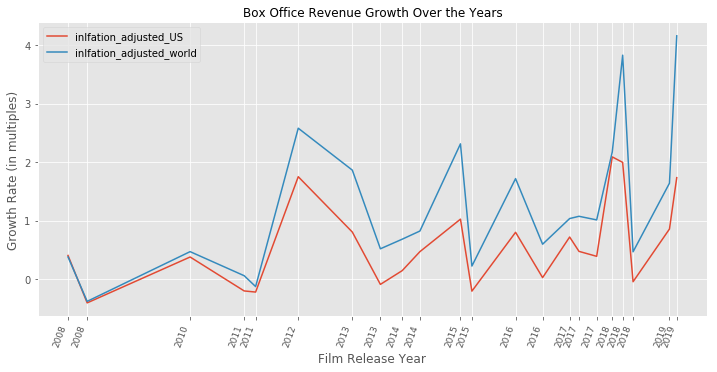

In [124]:
domestic_growth, ax=plt.subplots(figsize=(12,6))
growth_rate.inlfation_adjusted_US.plot(ax=ax,xticks=growth_rate.index.date)
growth_rate.inlfation_adjusted_world.plot(ax=ax, xticks=growth_rate.index.date)
plt.title ("Box Office Revenue Growth Over the Years", fontsize=12)
plt.xlabel("Film Release Year", fontsize=12)
plt.ylabel("Growth Rate (in multiples)", fontsize=12)
ax.tick_params(axis='x',rotation=70, labelsize=9)
ax.legend()
plt.savefig("box_growth")

This graphs tells us that the overall growth trend is positive, as the majority of the points are located above zero on the Y axis.

However, it would be useful to look at the actual box office revenues over time. These next steps are done to reflect that.

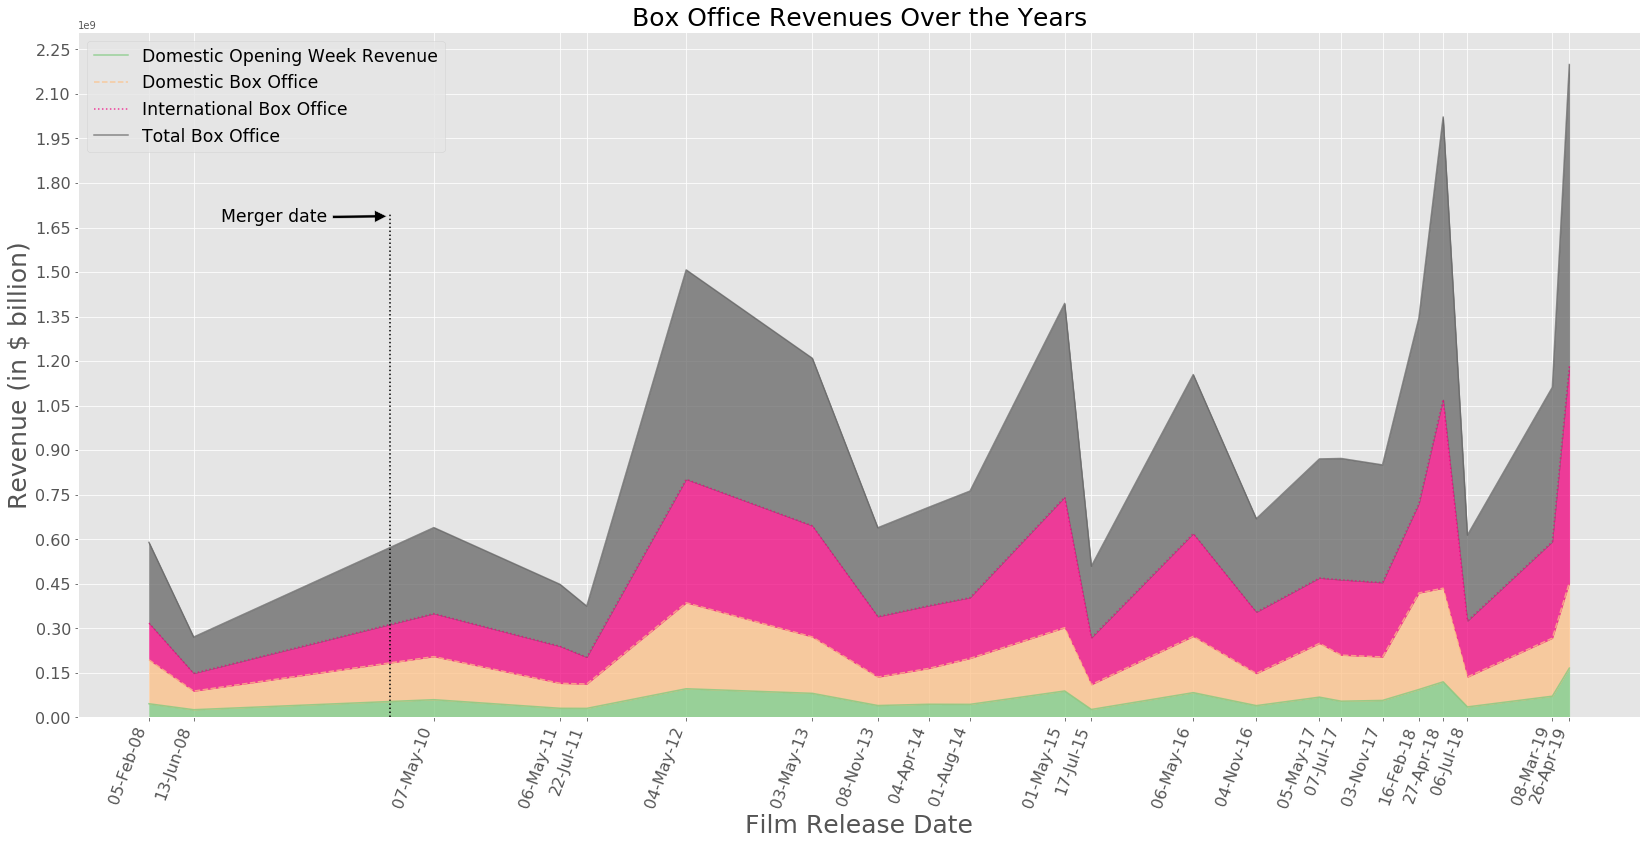

In [98]:
style=['-', '--', ":"]
labels=["Domestic Opening Week Revenue", 
        "Domestic Box Office", "International Box Office", "Total Box Office"]
colors=["crimson","navy","crimson","navy"]
box_office_graph, ax=plt.subplots(figsize=(28,14))
box_office_sub.plot.area(ax=ax, colormap="Accent", style=style,
                    xticks=box_office_sub.index.date, alpha=0.75)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(20))

plt.vlines(x=(dt.datetime(2009,12,31)), ymin=0,ymax=1700000000, linestyle=":")

ax.annotate('Merger date', xy=(dt.datetime(2009,12,31),1688000000), 
            xytext=(dt.datetime(2008,9,1), 1669000000), fontsize="xx-large", 
            arrowprops=dict(facecolor='black', shrink = 0.05, width=3)) 

plt.title ("Box Office Revenues Over the Years", fontsize=25)
plt.xlabel("Film Release Date", fontsize=25)
plt.ylabel("Revenue (in $ billion)", fontsize=25)

ax.legend(labels,frameon=True, fontsize="xx-large")
ax.tick_params(axis='x',rotation=70, labelsize=16)
ax.tick_params(axis='y', labelsize=16)


Some of the data points have scored much above others. We can identify those by date and label them on the graph.

In [99]:
merged.loc["2012-05-04"]

Name                          Marvel's The Avengers
open_week_revenue                         207438708
total_gross_US                            623357910
total_gross_intl                          895455078
total_world                              1518812988
inflation_adj_open_week_US            96,348,679.98
inlfation_adjusted_US                289,529,916.40
inlfation_adjusted_intl              415,910,393.87
inlfation_adjusted_world             705,440,310.26
num_theatres                                   4349
num_tix_sold_x                             78301450
CPI_adj_2008                                    NaN
year                                           2012
num_tix_sold_y                           1402603148
box_office_nominal                      11164723987
box_office_adj                          12777714678
avg_tix_price                                  7.96
other_disney_tix                          218325741
num_productions                                  18
Name: 2012-0

In [100]:
merged.loc["2015-05-01"]

Name                          Avengers: Age of Ultron
open_week_revenue                           191271109
total_gross_US                              459005868
total_gross_intl                            946397826
total_world                                1405403694
inflation_adj_open_week_US              88,839,344.64
inlfation_adjusted_US                  213,193,621.92
inlfation_adjusted_intl                439,571,679.52
inlfation_adjusted_world               652,765,301.44
num_theatres                                     4276
num_tix_sold_x                               54449094
CPI_adj_2008                                      NaN
year                                             2015
num_tix_sold_y                             1323262157
box_office_nominal                        11155102984
box_office_adj                            12054918255
avg_tix_price                                    8.43
other_disney_tix                            277660192
num_productions             

In [101]:
merged.loc["2018-04-27"]

Name                          Avengers: Infinity War
open_week_revenue                          257698183
total_gross_US                             678815482
total_gross_intl                          1369544272
total_world                               2048359754
inflation_adj_open_week_US            119,692,607.06
inlfation_adjusted_US                 315,288,194.15
inlfation_adjusted_intl               636,109,740.83
inlfation_adjusted_world              951,397,934.97
num_theatres                                    4474
num_tix_sold_x                              74513225
CPI_adj_2008                                     NaN
year                                            2018
num_tix_sold_y                            1313272361
box_office_nominal                       11963913722
box_office_adj                           11963913893
avg_tix_price                                   9.11
other_disney_tix                           344128465
num_productions                               

In [102]:
merged.loc["2019-04-26"]

Name                          Avengers: Endgame
open_week_revenue                     357115007
total_gross_US                        619698638
total_gross_intl                     1569000000
total_world                          2188698638
inflation_adj_open_week_US       165,868,558.76
inlfation_adjusted_US            287,830,300.98
inlfation_adjusted_intl          728,750,580.59
inlfation_adjusted_world       1,016,580,881.56
num_theatres                               4662
num_tix_sold_x                         69371882
CPI_adj_2008                                NaN
year                                       2019
num_tix_sold_y                       1239713179
box_office_nominal                  11293787064
box_office_adj                      11293787064
avg_tix_price                              9.11
other_disney_tix                      145307257
num_productions                               7
Name: 2019-04-26 00:00:00, dtype: object

In [103]:
# List of highest grossing movies: dates and names

date_list=["2012-05-04","2015-05-01","2018-04-27","2019-04-26"]
marked_movies=["Marvel's The Avengers", "Avengers: Infinity War", "Avengers: Age of Ultron" , "Avengers: Endgame"]

In [108]:
# Getting the point values of each observation for graphing
heights=[705440310.26,652765301,951397935,1016580882]

In [96]:
# Creating  a function that allows to convert string dates to datetime format

def date_converter(str_dates):
    datetime_dates=[]
    for n in range(len(str_dates)):
        k=pd.to_datetime(str_dates[n])  
        datetime_dates.append(k)
    return datetime_dates

In [97]:
# Stripping the datetime values creating above from time stamps for graphing purposes

def truncator(list_date):
    new_list_date=[]
    for n in range(len(list_date)): 
        d_truncated = dt.date(list_date[n].year, list_date[n].month, list_date[n].day)
        new_list_date.append(d_truncated)
    return new_list_date

In [104]:
date=date_converter(date_list)

In [107]:
empty=truncator(date)

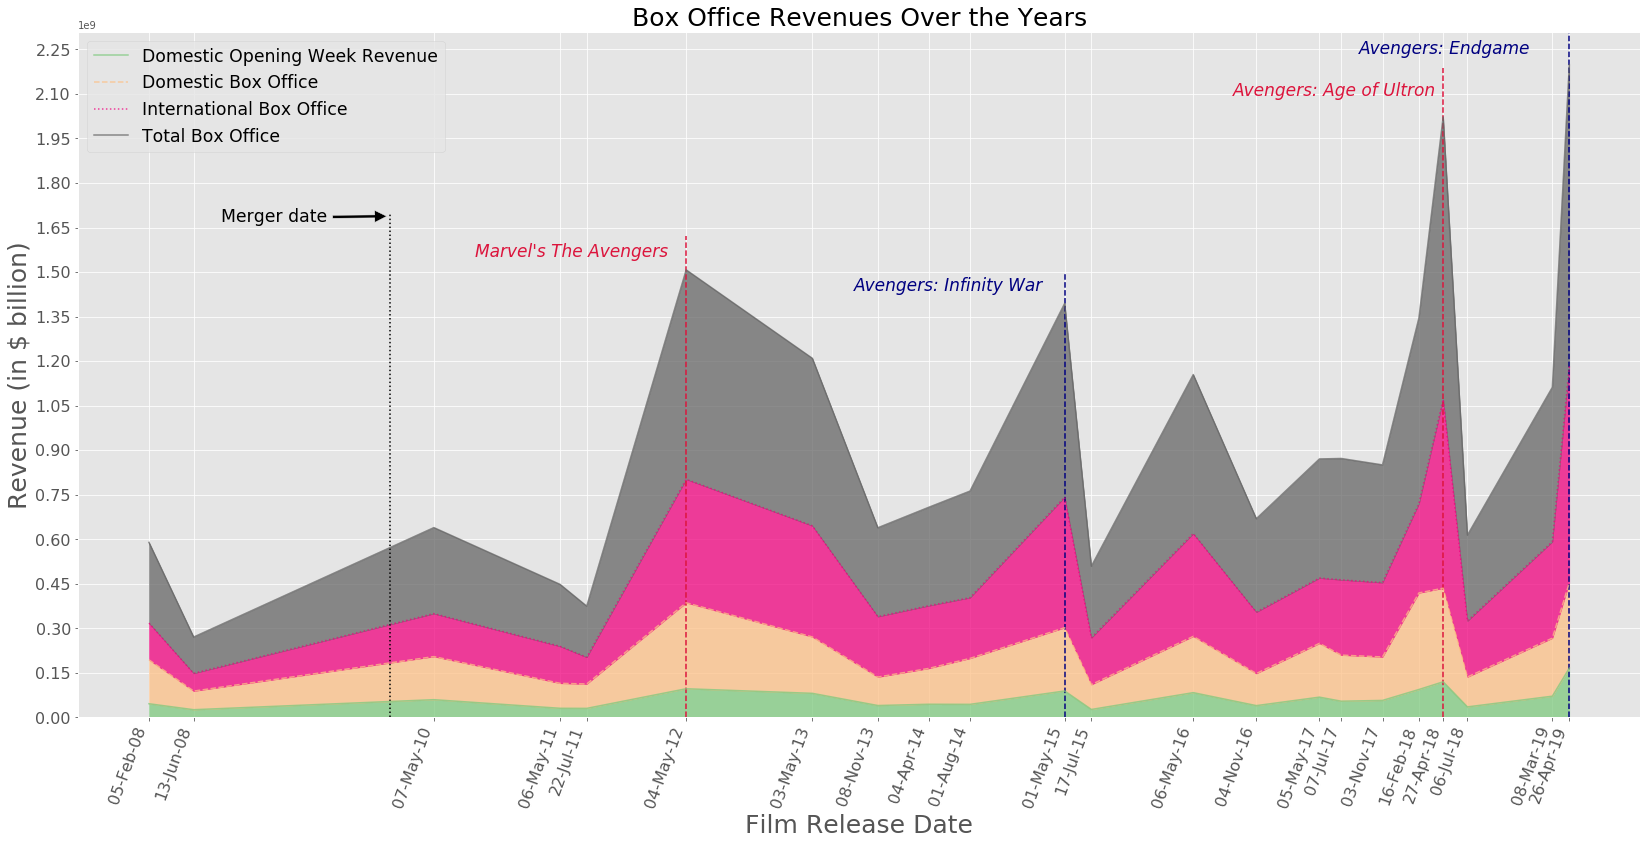

In [125]:
style=['-', '--', ":"]
labels=["Domestic Opening Week Revenue", 
        "Domestic Box Office", "International Box Office", "Total Box Office"]
colors=["crimson","navy","crimson","navy"]
box_office_graph_labeled, ax=plt.subplots(figsize=(28,14))
box_office_sub.plot.area(ax=ax, colormap="Accent", style=style,
                    xticks=box_office_sub.index.date, alpha=0.75)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(20))

plt.vlines(x=(dt.datetime(2009,12,31)), ymin=0,ymax=1700000000, linestyle=":")

ax.annotate('Merger date', xy=(dt.datetime(2009,12,31),1688000000), 
            xytext=(dt.datetime(2008,9,1), 1669000000), fontsize="xx-large", 
            arrowprops=dict(facecolor='black', shrink = 0.05, width=3)) 

for n in range(len(marked_movies)):
    plt.vlines(x=date_list[n], ymin=0, ymax=heights[n]*2.3, linestyle='--',color=colors[n])
    date_calculator=empty[n]+pd.DateOffset(months=-20)
    
    ax.annotate(marked_movies[n], xy=(date_calculator, heights[n]*2.2),
                xytext=(date_calculator, heights[n]*2.2), fontsize=17,
                color=colors[n], fontstyle="italic")

plt.title ("Box Office Revenues Over the Years", fontsize=25)
plt.xlabel("Film Release Date", fontsize=25)
plt.ylabel("Revenue (in $ billion)", fontsize=25)

ax.legend(labels,frameon=True, fontsize="xx-large")
ax.tick_params(axis='x',rotation=70, labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.savefig("box_office_marked")

As we see, the Avengers series have brought MCU and Disney the most money. Each upper part of the shaded area shows trends for collected revenues, respectively (as specified in the legend in the upper left corner). Shaded areas on the graph show the difference between each column:

-  Green - volume of opening week box office revenues 
- Peach - difference between opening week revenues and the domestic box office revenues (calculated at closing date)
- Pink - difference between domestic box office revenues and international box office revenues
- Grey - difference between international box office and world gross.

There is an interesting trend shown here: pink shaded areas have grown over time, implying greater engagement of the international audience.

However, even after looking at the data above, we cannot conclusively say why the box office revenues have been growing. Is this because of better movie quality? Let's look at the rating data to see if the audience has enjoyed new films more.

For that, I examine professional and user ratings from Rotten Tomatoes and IMDb.

 ##### Reviews

In [110]:
review.set_index("title", inplace=True)

In [111]:
review.columns.tolist()

['genre',
 'year',
 'runtime_min',
 'imdb_rating',
 'imdb_vote',
 'imdb_metascore',
 'rt_audience_pct',
 'rt_prof_rev',
 'rt_rev_num',
 'rt_user_rating_num']

In [113]:
review_sub=review.drop(['genre', "year", "runtime_min"], axis=1)

In [114]:
review_sub.head()

,imdb_rating,imdb_vote,imdb_metascore,rt_audience_pct,rt_prof_rev,rt_rev_num,rt_user_rating_num
title,,,,,,,
Iron Man,7.90,737719,79,0.91,0.93,275,1081473
The Incredible Hulk,6.80,342355,61,0.70,0.67,229,738333
Iron Man 2,7.00,556666,57,0.71,0.73,289,479864
Thor,7.00,570814,57,0.76,0.77,282,246791
Captain America: The First Avenger,6.90,547368,66,0.74,0.80,263,187978


The columns all have different values. It would help to convert them to percentage points on 100% scale. 

In [115]:
review_sub["rt_prof_rev"]=review_sub["rt_prof_rev"]*100

In [116]:
review_sub["rt_audience_pct"]=review_sub["rt_audience_pct"]*100

In [117]:
review_sub["imdb_rating"]=review_sub["imdb_rating"]*10

I'd also like to plot how the number of reviews have changed. To meaningfully compact it, I scale `imdb_vote` and `rt_user_rating_num` based on the highest number of reviews and take that as 100%.

In [120]:
review["imdb_num_stand"]=100*(review.imdb_vote/review.imdb_vote.max())

In [121]:
review["rt_num_stand"]=100*(review.rt_user_rating_num/review.rt_user_rating_num.max())

###### IMDb ratings.

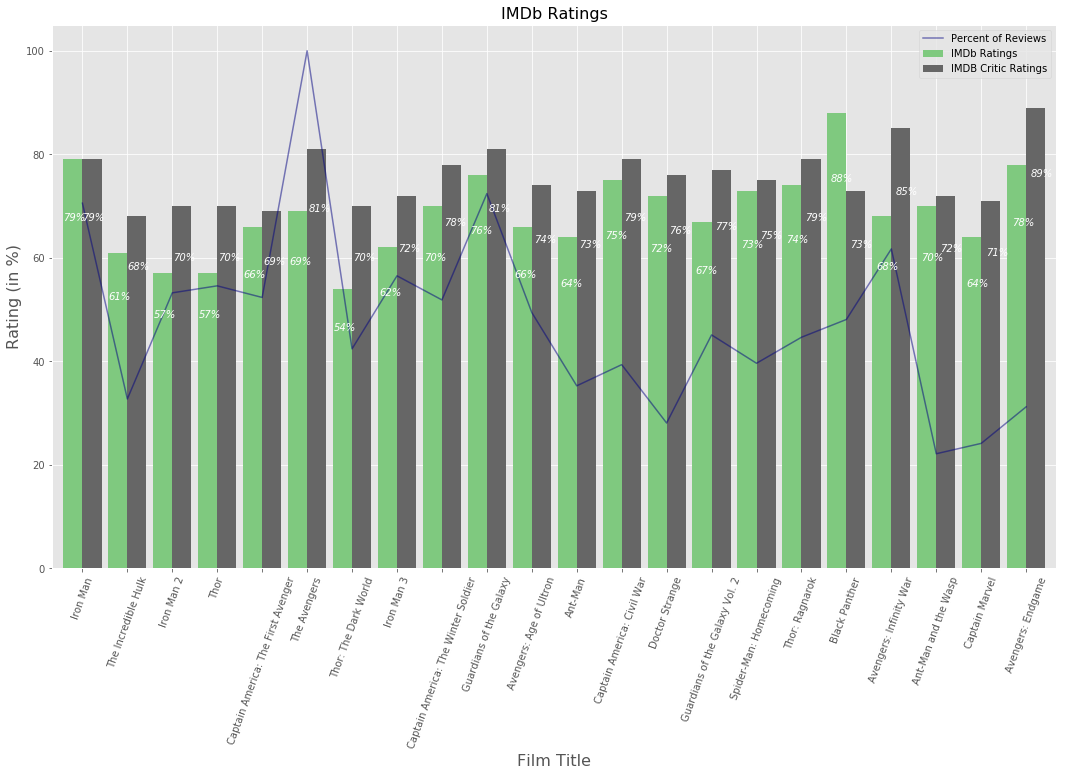

In [126]:
legend=["Percent of Reviews","IMDb Ratings", "IMDB Critic Ratings"]

review_plot_imdb, ax=plt.subplots(figsize=(18,10))

review_sub.plot.bar(ax=ax,y=["imdb_metascore", "imdb_rating"], colormap="Accent", width=0.85)
review.imdb_num_stand.plot(ax=ax,color="navy", alpha=0.5)
ax.legend(legend,frameon=True, fontsize=10)
ax.tick_params(axis='x',rotation=70, labelsize=10)
plt.title ("IMDb Ratings", fontsize=16)
plt.xlabel("Film Title", fontsize=16)
plt.ylabel("Rating (in %)", fontsize=16)
colors=['g','k']
for p in ax.patches:
    height=p.get_height()
    name=str("{:.0f}".format(height))+"%"
    ax.annotate(name, (p.get_x() * 1.005, p.get_height() *0.85), fontsize=10, color='w', fontstyle="oblique" )

plt.savefig("rating_imdb")

##### Rotten Tomatoes ratings.

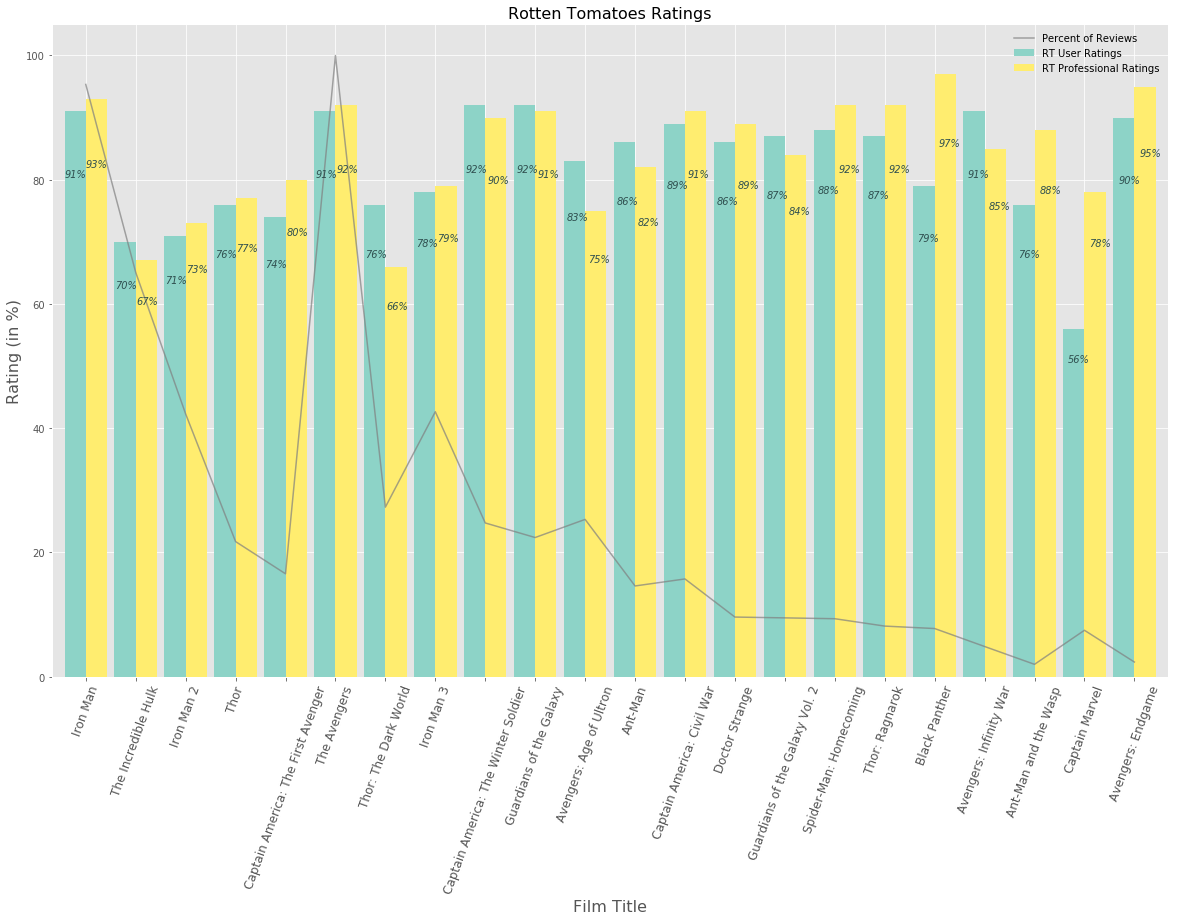

In [127]:
legend=["Percent of Reviews ","RT User Ratings", "RT Professional Ratings"]
rt_plot, ax=plt.subplots(figsize=(20,12))
review_sub.plot.bar(ax=ax,y=["rt_audience_pct", "rt_prof_rev"], colormap="Set3", width=0.85)
review.rt_num_stand.plot(ax=ax,color="grey", alpha=0.7)
ax.legend(legend,frameon=False, fontsize=10,loc="upper right")
ax.tick_params(axis='x',rotation=70, labelsize=12)
plt.title ("Rotten Tomatoes Ratings", fontsize=16)
plt.xlabel("Film Title", fontsize=16)
plt.ylabel("Rating (in %)", fontsize=16)
colors=['g','k']
for p in ax.patches:
    height=p.get_height()
    name=str("{:.0f}".format(height))+"%"
    ax.annotate(name, (p.get_x() * 1.005, p.get_height() * 0.85+3), 
                fontsize=9.8, color='darkslategray', fontstyle="oblique")
plt.savefig("rt_ratings")

The graphs above tell us that film raitngs have been more or less consistent over time, amongst both critics and audience. We also observe that the number of ratings have been declining over the years (at least for Rotten Tomatoes).

There is also a possibility that other factors have influenced the ratings. For example, the duration of the movie. Let's see how it affects rating value.

In [129]:
review_sub["runtime_min"]=review["runtime_min"]

In [130]:
review_sub.head()

,imdb_rating,imdb_vote,imdb_metascore,rt_audience_pct,rt_prof_rev,rt_rev_num,rt_user_rating_num,difference,runtime_min
title,,,,,,,,,
Iron Man,79.00,737719,79,91.00,93.00,275,1081473,0.00,126
The Incredible Hulk,68.00,342355,61,70.00,67.00,229,738333,7.00,112
Iron Man 2,70.00,556666,57,71.00,73.00,289,479864,13.00,124
Thor,70.00,570814,57,76.00,77.00,282,246791,13.00,115
Captain America: The First Avenger,69.00,547368,66,74.00,80.00,263,187978,3.00,124


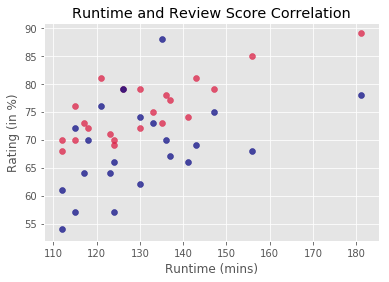

In [131]:
correlation, ax=plt.subplots()
ax.scatter(review_sub.runtime_min,review_sub.imdb_rating, color="crimson", alpha=0.7)
ax.scatter(review_sub.runtime_min,review_sub.imdb_metascore, color="navy", alpha=0.7)
plt.xlabel("Runtime (mins)")
plt.ylabel("Rating (in %)")
plt.title("Runtime and Review Score Correlation")
plt.savefig("correlation")

There seems to be a positive correlation between ratings and runtime. Let's see if that could have affected reviews.

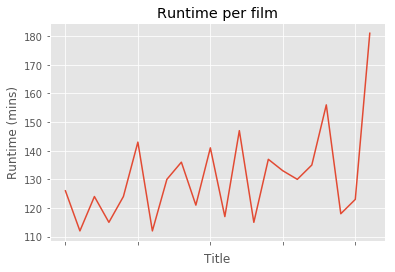

In [134]:
runtime, ax= plt.subplots()
review_sub.runtime_min.plot()
plt.ylabel("Runtime (mins)")
plt.xlabel("Title")
plt.title("Runtime per film")
plt.savefig("runtime")

As data is sorted chronologically, we can see that as a general trend, runtime has indeed been increasing. However, we cannot meaningfully use that given the small sample size.

This makes me wonder: why have MCU movies been collecting more and more money over time? Looking at the box office revenue chart, we can see that revenues have increased significantly over time. We can also see that the films have been making more money on the international market over time. Is this a consequence of rising demand for movie tickets over all or is MCU outperforming the market?

##### Industry trends.

In [135]:
industry_stats.head()

,year,num_tix_sold,box_office_nominal,box_office_adj,avg_tix_price,other_disney_tix,num_productions
0,2008,1358041408,9750739371,12371757232,7.18,139286843,19
1,2009,1418567388,10639257284,12923123576,7.50,160753063,23
2,2010,1328549021,10482254025,12103081587,7.89,185776694,17
3,2011,1282891721,10173333767,11687143588,7.93,154494310,18
4,2012,1402603148,11164723987,12777714678,7.96,218325741,18


In [136]:
industry_stats.set_index('year', inplace=True)

In [139]:
box_office.set_index("year", inplace=True)

In [140]:
# For purposes of creating a meaningful stacked bar chart
industry_stats["delta_mcu_tix"]=industry_stats.num_tix_sold-box_office.num_tix_sold.groupby("year").sum()

In [142]:
industry_stats=industry_stats.dropna()

In [143]:
industry_stats.head()

,num_tix_sold,box_office_nominal,box_office_adj,avg_tix_price,other_disney_tix,num_productions,delta_mcu_tix
year,,,,,,,
2008,1358041408,9750739371,12371757232,7.18,139286843,19,"1,294,918,983.00"
2010,1328549021,10482254025,12103081587,7.89,185776694,17,"1,288,950,374.00"
2011,1282891721,10173333767,11687143588,7.93,154494310,18,"1,237,786,408.00"
2012,1402603148,11164723987,12777714678,7.96,218325741,18,"1,324,301,698.00"
2013,1339244141,10888057844,12200514133,8.13,213904700,17,"1,288,581,049.00"


In [144]:
industry_stats['mcu_tix']=box_office.num_tix_sold.groupby("year").sum()

In [145]:
sub_ind=industry_stats[["mcu_tix", "delta_mcu_tix"]]

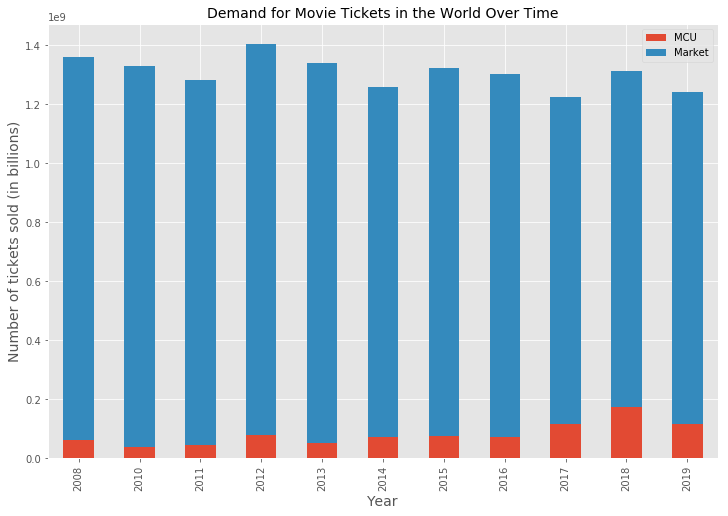

In [149]:
names=["MCU","Market"]
stats, ax=plt.subplots(figsize=(12,8))
sub_ind.plot.bar(ax=ax, stacked=True)
ax.legend(names)
plt.title ("Demand for Movie Tickets in the World Over Time", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of tickets sold (in billions)", fontsize=14)
plt.savefig("demand")

The bar chart does not let us clearly observe a trend. Neither does a regular line plot. Therefore, to interpret it, I need to run a regression of number of tickets sold on time.

In [157]:
industry_stats['year']=industry_stats.index

In [158]:
mcu = sm.ols(formula="mcu_tix ~ year ", data=industry_stats).fit()
print(mcu.summary())

                            OLS Regression Results                            
Dep. Variable:                mcu_tix   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     12.65
Date:                Tue, 21 May 2019   Prob (F-statistic):            0.00615
Time:                        12:23:36   Log-Likelihood:                -202.67
No. Observations:                  11   AIC:                             409.3
Df Residuals:                       9   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.742e+10   4.92e+09     -3.540      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [160]:
industry=sm.ols(formula="num_tix_sold ~ year ", data=industry_stats).fit()
print(industry.summary())

                            OLS Regression Results                            
Dep. Variable:           num_tix_sold   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     4.984
Date:                Tue, 21 May 2019   Prob (F-statistic):             0.0525
Time:                        12:24:05   Log-Likelihood:                -208.24
No. Observations:                  11   AIC:                             420.5
Df Residuals:                       9   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.953e+10   8.16e+09      2.392      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


We can see that the respective regression betas are b(MCU)=8.689e+06 and b(industry)=-9.05e+06. Both are statistically significant at 90% confidence level and indicate positive dynamic for Marvel movies and negative for the industry. Therefore, we can say that MCU movies have outperformed the market in terms of demand for tickets.

This lets me conclude that Marvel movies's growing revenues are not due to the market dynamics. Rather, their box office success is correlated with *movie quality* and **brand recognition**.

### Part Two: Analysis
#### Argument: Marvel saved Disney.

In this section, I am going to examine the effect of the merger on Disney's financial performance to see if the effect has been the reverse.

In [161]:
stock['Date']=pd.to_datetime(stock['Date'])

In [162]:
stock.set_index("Date", inplace=True)

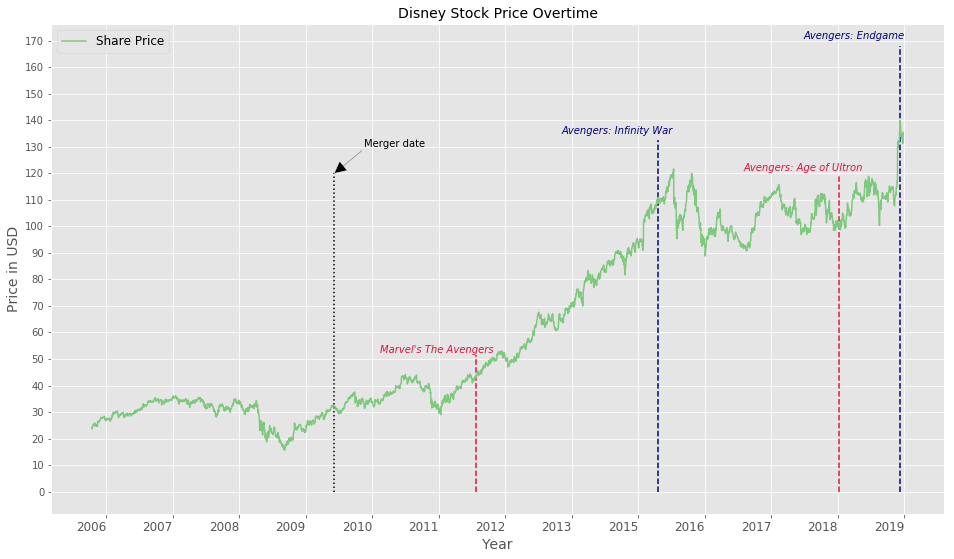

In [165]:
exp=["Share Price"]
marked_movies=["Marvel's The Avengers", "Avengers: Infinity War", "Avengers: Age of Ultron" , "Avengers: Endgame"]

colors=["crimson","navy","crimson","navy"]

stock_graph, ax=plt.subplots(figsize=(16,10))
stock.Close.plot(ax=ax,colormap="Accent")
ax.legend(exp,frameon=True, fontsize=12, loc="upper left")
ax.tick_params(axis='x',rotation=0, labelsize=12)
plt.title ("Disney Stock Price Overtime", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Price in USD", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.yaxis.set_major_locator(plt.MaxNLocator(20))
plt.vlines(x=(dt.datetime(2009,12,31)), ymin=0,ymax=120, linestyle=":")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(14))


ax.annotate('Merger date', xy=(dt.datetime(2009,12,31),120), 
            xytext=(dt.datetime(2010,6,28), 130), fontsize=10, 
            arrowprops=dict(facecolor='black', width=0.8)) 

for n in range(len(marked_movies)):
    plt.vlines(x=date_list[n], ymin=0, ymax=stock.Close.loc[date_list[n]]*1.2, linestyle='--',color=colors[n])
    date_calculator=empty[n]+pd.DateOffset(months=-19)
    
    ax.annotate(marked_movies[n], xy=(date_calculator, stock.Close.loc[date_list[n]]+10),
                xytext=(date_calculator,stock.Close.loc[date_list[n]]*1.22), fontsize=10,
                color=colors[n], fontstyle="italic")
plt.savefig("stock")

Looking at the stock price performance, we can conclude that Disney's stock **has** grown since the time of the acquisition. Marking the highest grossing movies, also shows a positive effect of the releases on stock price.

However, stocks are highly volatile and can be affected by a number of other factors, particularly, major acquisitions.

Since and before 2009, Disney has made a lot of acquisitions to its business, growing in most of its segments:

- Media networks

    - UTV Software Communications, February 1, 2012
    
    - BAMTech 33% acquisition, August 17, 2016


- Studio Entertainment

    - Pixar - August 23, 2006
    - 20th, 21st Century Fox, December 14, 2017
    

- Theme Parks and Resorts

    - Opening of Disneyland in Shanghai, April 4, 2011
    


- Internet and Direct Marketing 

    - Streaming services announcement, August 9, 2017

Therefore, their stock price could have been also affected by these events. Let's have a look.

In [166]:
shopping=['2006-01-23','2011-04-07','2012-02-07','2016-08-17','2017-08-09','2017-12-14']

In [167]:
shopping=date_converter(shopping)

In [168]:
shopping=truncator(shopping)

In [169]:
events=["   Pixar","Shanghai DL","      UTV SC","BAMTech", "Stream","Fox"]

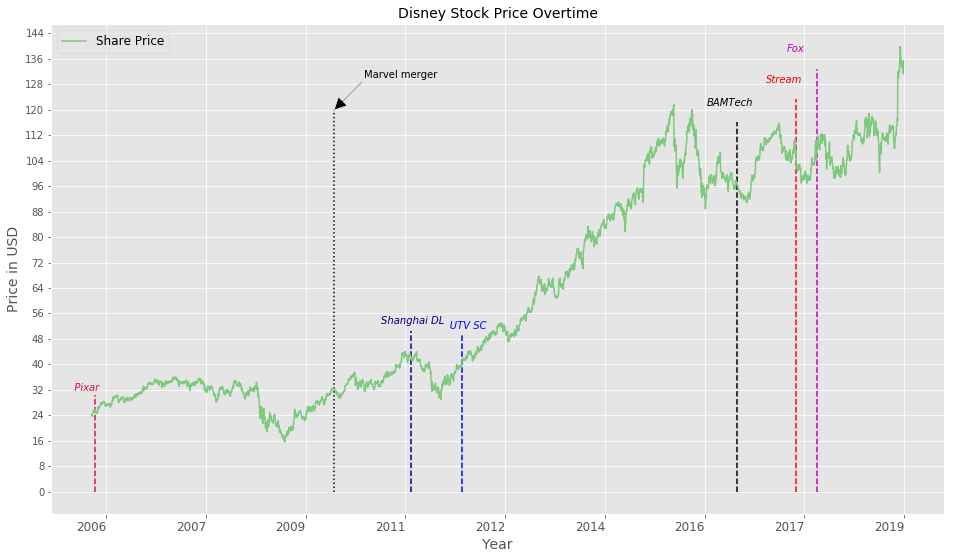

In [171]:
lines=["crimson","navy","b","k", 'r','m']

acquisitions, ax=plt.subplots(figsize=(16,10))
stock.Close.plot(ax=ax,colormap="Accent")
ax.legend(exp,frameon=True, fontsize=12, loc="upper left")
ax.tick_params(axis='x',rotation=0, labelsize=12)
plt.title ("Disney Stock Price Overtime", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Price in USD", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.yaxis.set_major_locator(plt.MaxNLocator(20))
plt.vlines(x=(dt.datetime(2009,12,31)), ymin=0,ymax=120, linestyle=":")

ax.annotate('Marvel merger', xy=(dt.datetime(2009,12,31),120), 
            xytext=(dt.datetime(2010,6,28), 130), fontsize=10, 
            arrowprops=dict(facecolor='black', width=0.8)) 

for n in range(len(events)):
    plt.vlines(x=shopping[n], ymin=0, ymax=stock.Close.loc[shopping[n]]*1.2, linestyle='--', color=lines[n])
    date_calculator=shopping[n]+pd.DateOffset(months=-6)
    
    ax.annotate(events[n], xy=(date_calculator, stock.Close.loc[shopping[n]]+10),
                xytext=(date_calculator,stock.Close.loc[shopping[n]]*1.25), fontsize=10,
                color=lines[n], fontstyle="italic")
plt.savefig("shopping")

The general impact of M&A's on stock is, historically speaking, negative (at least in the immediate terms). However, the company's stock has continued to grow over time, which implies successful business management of the new units. 

We cannot, therefore, conclusively say if MCU has been the driver of Disney's success, but we can be sure that it contributed to company's growth. Perhaps, the profit made on MCU productions drove further expansion and success. 

Although we cannot decifer if MCU's success had greatest profit margins amongst all sectors as such data is unavailable, we can examine what share of the film market in the US have MCU productions occupied - to give us a rough idea.

In [173]:
merged["market_share_mcu"]=100*(merged.num_tix_sold_x/merged.num_tix_sold_y)

In [174]:
merged["market_share_disney"]=100*(merged.other_disney_tix/merged.num_tix_sold_y)

In [175]:
mcu_year=merged.market_share_mcu.resample('y').sum()

In [176]:
disney_year=merged.market_share_disney.resample("y").mean()

In [177]:
new_df=pd.DataFrame(mcu_year)

In [178]:
new_df=new_df.join(disney_year)

In [179]:
new_df.dropna(inplace=True)

In [180]:
new_df.set_index(new_df.index.year, inplace=True)

In [181]:
new_df

,market_share_mcu,market_share_disney
US_release_date,,
2008,4.65,10.26
2010,2.98,13.98
2011,3.52,12.04
2012,5.58,15.57
2013,3.78,15.97
2014,5.77,15.59
2015,5.73,20.98
2016,5.67,26.07
2017,9.42,21.74


In [182]:
new_df["market_share_disney_only"]=new_df.market_share_disney-new_df.market_share_mcu

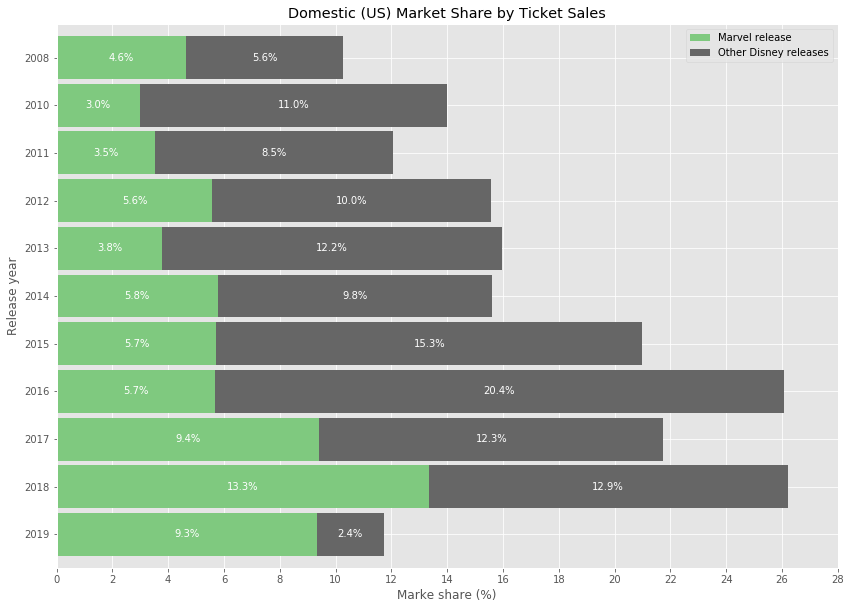

In [183]:
market_share, ax = plt.subplots(figsize=(14,10))
new_df[["market_share_mcu","market_share_disney_only"]].plot.barh(ax=ax, 
                                                                  width=0.9, stacked=True,
                                                                  colormap="Accent", xticks=range(0,30,2))
ax.legend(["Marvel release", "Other Disney releases"])
plt.title ("Domestic (US) Market Share by Ticket Sales")
plt.xlabel("Marke share (%)")
plt.ylabel("Release year")

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    label=str("{:.1f}".format(width))+"%"
    ax.annotate(label, xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', color="w")
   # ax.annotate(str("{:.1f}".format(new_df.market_share_disney)), xy=(width,bottom+height/2),
    #            ha="center", va="center")
ax.invert_yaxis()
plt.savefig("market_share")

This plot tells us that Disney managed to capture up to 26% of the domestic movie market - a large margin considering the competition. A significant part of it is MCU films. Therefore, MCU films have brought greater returns to the company as compared to the sum of other productions by Dinsey in a given year.


## Conclusion

The report above has shown us the following things:

1. *Marvel Cinematic Universe productions have been grossing more since the time of the acquisition.*


      - Is the reason for that - Disney's involvement?
    
          This is inconclusive. Our sample size totals 22 observations for the movies made, only 2 of which have been pre-Disney era. therefore, it is hard to tell if their success is attributed to Disney's involvement in production or the general success of the superhero movie idea. As quality remained stable throughout the franchise given our analysis of the review data, we cannot make an argument of Disney's production development skills.
        
        
     - Is the reason - general market trends?
         
         The answer is no, as shown by the regression. MCU productions have been outperforming the market for movie tickets, which speaks of the *strong brand value* of the franchise.
         

2. *Disney has grown significantly since the merger.*

    
      - Is this because of Marvel?
      
          This remains inconclusive, although the general impact of box office hits on the stock has been positive. There has been a number of acquisitions since and before the Marvel Entertainment, which in turn could have contributed greatly to the growth of the company.
          

#### Limitations.

As stated in the conclusion above, there have been a number of limitations to this study.

First and foremost, of course, is the **sample size***. The difficulty in arriving to a clear conclusion lies in the absence of greater sample of observations preceding the merger that could show some form of a trend. The acquisition happened at the dawn of the Marvel Cinematic Universe, and was a timely purchase by Disney.


Second is the **scope of data**. There is only so much to be shown with the data provided, and more can be concluded if financial statements breaking down each sector performance have been available. However, that lies beyond the scope of this project and can be examined in its further iterations.